# Author: Aditi Langar

~ Under the GRIP tasks by The Sparks Founadtion in December 2020

## Problem Statement: To cluster the data into different clusters using K-Means clustering

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [2]:
iris = pd.read_csv("Iris.csv")

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Exploration

#### Checking the data info

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Checking the null values

In [4]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Checking the duplicate values

In [5]:
iris.duplicated().sum()

0

#### Descriptive Statistics

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Checking the distribution of the target class

In [7]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

Classes are balanced

## Univariate Analysis

#### Histogram for Sepal Length

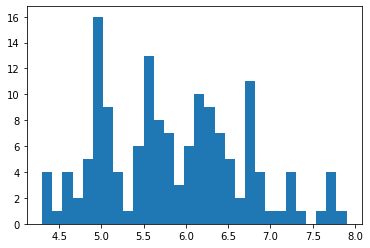

In [8]:
plt.hist(iris['SepalLengthCm'], bins = 30);

#### Histogram for Sepal Width

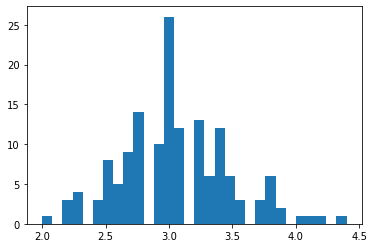

In [9]:
plt.hist(iris['SepalWidthCm'], bins = 30);

#### Histogram for Petal Length

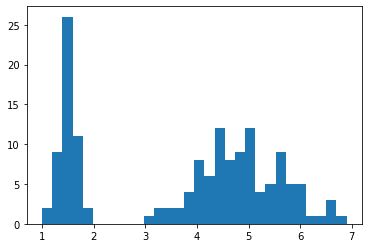

In [10]:
plt.hist(iris['PetalLengthCm'], bins = 30);

#### Histogram for Petal Width

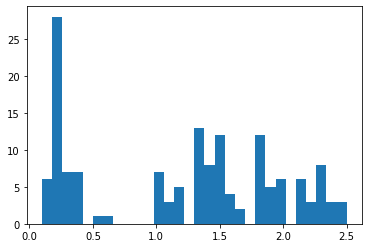

In [11]:
plt.hist(iris['PetalWidthCm'], bins = 30);

#### Checking data distribution

Feature:  SepalLengthCm


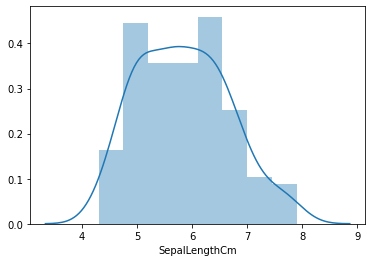

*****************************************************************************************************************************
Feature:  SepalWidthCm


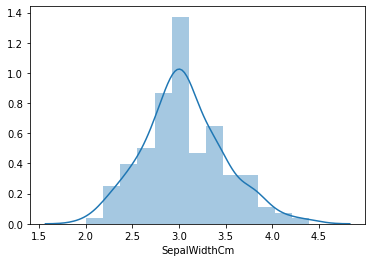

*****************************************************************************************************************************
Feature:  PetalLengthCm


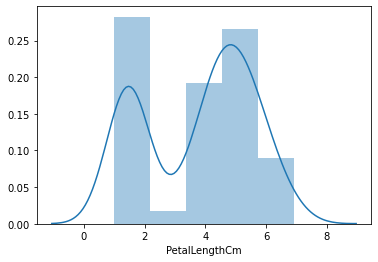

*****************************************************************************************************************************
Feature:  PetalWidthCm


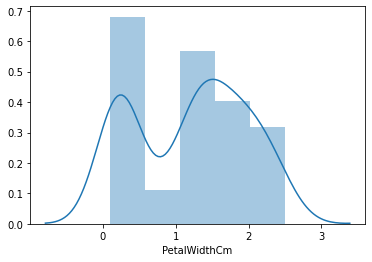

*****************************************************************************************************************************


In [12]:
for col in iris.iloc[:,1:].columns:
    if iris[col].dtype != object:
        print("Feature: ", col)
        sns.distplot(iris[col])
        plt.show()
        print("*"*125)

#### Checking for outliers

Feature:  Id


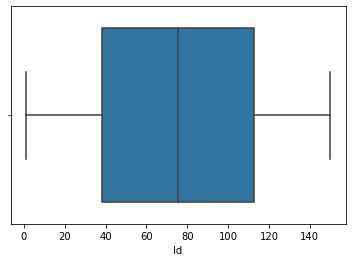

*****************************************************************************************************************************
Feature:  SepalLengthCm


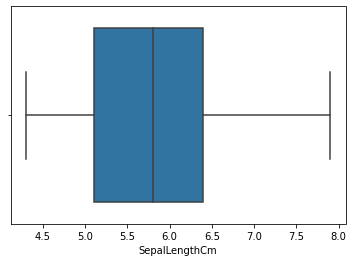

*****************************************************************************************************************************
Feature:  SepalWidthCm


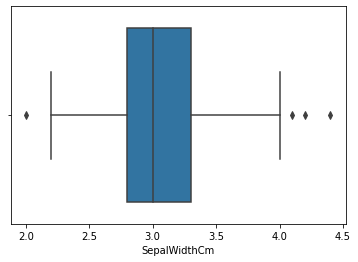

*****************************************************************************************************************************
Feature:  PetalLengthCm


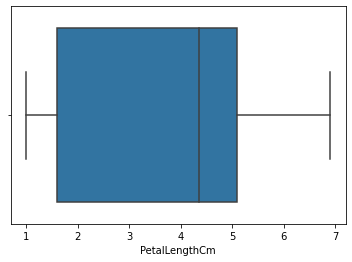

*****************************************************************************************************************************
Feature:  PetalWidthCm


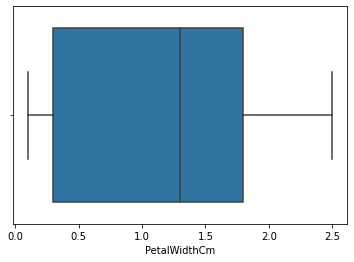

*****************************************************************************************************************************


In [13]:
for col in iris.columns:
    if iris[col].dtype != object:
        print("Feature: ", col)
        sns.boxplot(iris[col])
        plt.show()
        print("*"*125)

Leaving the outliers as such for now

## Bivariate Analysis

#### Barplots

Plot for Variety vs Id


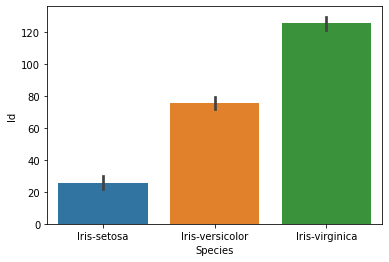

*****************************************************************************************************************************
Plot for Variety vs SepalLengthCm


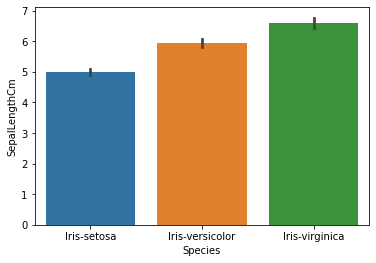

*****************************************************************************************************************************
Plot for Variety vs SepalWidthCm


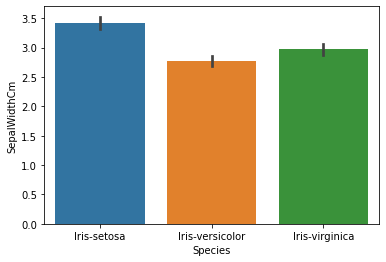

*****************************************************************************************************************************
Plot for Variety vs PetalLengthCm


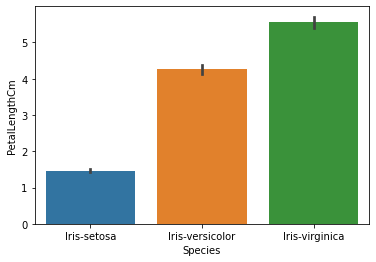

*****************************************************************************************************************************
Plot for Variety vs PetalWidthCm


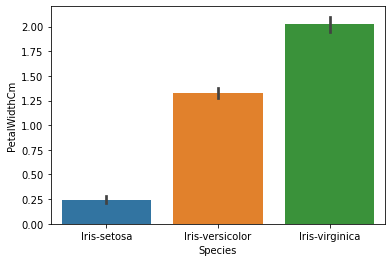

*****************************************************************************************************************************


In [14]:
for col in iris.iloc[:,:-1].columns:
    print("Plot for Variety vs {}".format(col))
    sns.barplot(x= iris.Species, y = iris[col])
    plt.show()
    print("*"*125)

Observations:

1. Setosa has the least petal length and width
2. Viginica has maximum sepal lenght, petal lenght and petal width
3. Cersicolor lies in between the 2 for all the cases

#### Checking the relationship between petal length and petal width

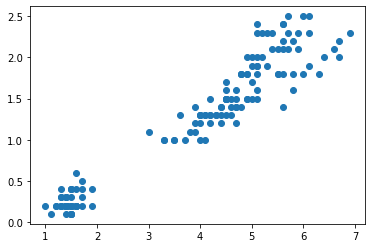

In [15]:
plt.scatter(iris["PetalLengthCm"], iris["PetalWidthCm"])

There appears some kind of linear relationship between the two

#### Checking relationship between sepal length and sepal width

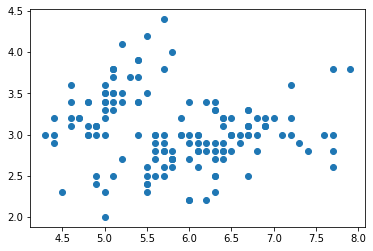

In [16]:
plt.scatter(iris["SepalLengthCm"], iris["SepalWidthCm"])

No relationship exists between the two

#### Checking relationship between sepal length and petal length

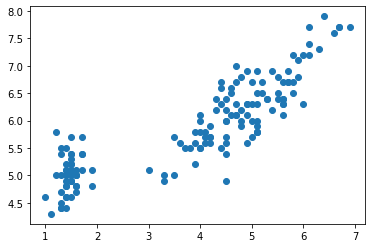

In [17]:
plt.scatter(iris["PetalLengthCm"], iris["SepalLengthCm"])

#### Creating a correlation matrix

In [18]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## Finding the optimal number of clusters

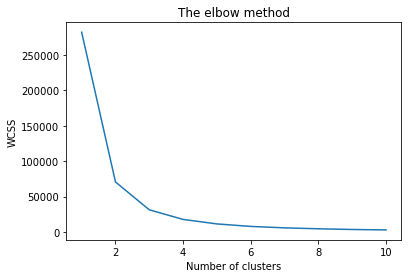

In [19]:
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

As per this graph, the optimal number of clusters are either 2 or 3

#### For total clusters=2

In [20]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 2, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
kmeans.inertia_

70581.3808

In [22]:
kmeans.cluster_centers_

array([[ 38.        ,   5.34133333,   3.204     ,   2.41333333],
       [113.        ,   6.34533333,   2.904     ,   5.104     ]])

In [23]:
iris['2 clusters result'] = y_kmeans

In [24]:
iris['2 clusters result'].value_counts()

1    75
0    75
Name: 2 clusters result, dtype: int64

#### For total clusters=3

In [25]:
kmeans3 = KMeans(n_clusters = 3, random_state = 0)

y_kmeans3 = kmeans3.fit_predict(x)

y_kmeans3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
kmeans3.inertia_

31320.711199999994

In [27]:
kmeans3.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

In [28]:
iris['3 clusters result'] = y_kmeans3

In [29]:
iris['3 clusters result'].value_counts()

2    50
1    50
0    50
Name: 3 clusters result, dtype: int64

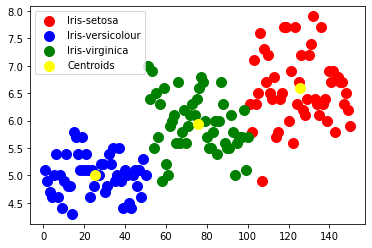

In [30]:
# Visualising the clusters

plt.scatter(x[y_kmeans3 == 0, 0], x[y_kmeans3 == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans3 == 1, 0], x[y_kmeans3 == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans3 == 2, 0], x[y_kmeans3 == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

There are 3 clear cluster distinctions